<a href="https://colab.research.google.com/github/RAGHAVSHARMA01/Machine_learning_project/blob/main/Machine_learning_class_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TRAIN WITH ANN**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Binary classification on the churn_modelling dataset where we will predict that wheather ot not the costomer will exit the bank or not

In [5]:
import numpy as np

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [8]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:

# exit is hence here the dependent feature and rest else are the independent features
# initally we will be converting the entire dataset into the independent and dependent features
# X = independent features

X = dataset.iloc[:,3:13] # iloc is the index location from the 3 to 13 column, as the remaing others like the rollnumber,CostomerId,  surname wont play a crucial role on the exiting predictions
y = dataset.iloc[:,13]  # all the rows and the target feature that is the 13 location "ecited"

In [10]:
X.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [11]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [12]:
# now lets do some feature engineering as we need to convert into the categoriacl features like on 1hard encoding 1/0
geography = pd.get_dummies(X['Geography'], drop_first=True) # we deoped th efrance column also as where the germany and spain woud be false there the france would be true
gender = pd.get_dummies(X['Gender'], drop_first=True)


In [13]:
# lets concatinate this to the dataframe
X=X.drop(['Geography','Gender'], axis = 1) # axis = 1 says that i will drop the columns not the rows

In [14]:
X = pd.concat([X,geography,gender], axis = 1) # we need the concatination to happen in column wose not in row wise

In [15]:
# splitting the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [16]:
  # feature scaling
  from sklearn.preprocessing import StandardScaler # StandarScalar is used where we have to standarise the numberical data with in the mean 0 and standard deviation of i,  as it revolves aroung the z-score hence it is also known as the z-score normalisation
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train) #The fit() part of fit_transform() calculates the necessary parameters for scaling, such as the mean and standard deviation for each feature in the training data. These statistics are derived only from the training set, which represents the "known" data the model learns from.
  X_test = sc.transform(X_test) #For the test dataset, only the transform() method is used. This means the same mean and standard deviation calculated from the training data are applied to scale the test data
  # Applying fit_transform() to the test data would mean recalculating the mean and standard deviation from the test data itself. This would introduce information from the test set into the scaling process, effectively "leaking" information about the unseen data to the model during training.

In [17]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [18]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [19]:
X_train.shape

(8000, 11)

In [20]:
X_test.shape

(2000, 11)

In [21]:
# Create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout


In [22]:
# initialize the ANN
classifier = Sequential()

In [23]:
# adding th input layer
# as we have 11 columns hence we need the 11 input nodes
classifier.add(Dense(units=11,activation='relu') ) # made the input layer,  how many node are there we specified and which activation function to be applied to the next layer is also specified here only
#classifier.add(Dropout(0.2))   this is the dropout layer that can be added after every layer

In [24]:
  # adding the fist hidden layer
classifier.add(Dense(units=7,activation='relu') )

In [25]:
# adding the second hidden layer
classifier.add(Dense(units=6,activation='relu') )

In [26]:
# adding the output layer
classifier.add(Dense(units=1,activation='sigmoid') ) # sigmoid is for the binary classification


#### By default the adam uses the learing rate od 0.01 but we can use another learning rates also:-

In [27]:
# like if we write optimizer='adam' in above command then the by default the learing rate that would be used by adam would be 0.01
# now lets do something that is making a random learnng rate function but will keep learning rate as 0.01

import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01) # optimizer='adam replace adam woth opt

In [28]:
# lets start to train it
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy']) # here the optimise used is the adam and the loss function used here is the binary cross entropy as the problem is of the binary type, and the matrix that i will be more focused on would be the accuracy

In [29]:
#Early stoping condition :- it will see that when the accuaracy of the model is not at all increasing it will stop training
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [30]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000, callbacks = early_stopping)#this will run for 1000 epocs but after some time we will se that the accuracy will keep on iterating withing some values hence we need the early stoping here


Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7873 - loss: 0.4717 - val_accuracy: 0.8273 - val_loss: 0.3945
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8393 - loss: 0.3832 - val_accuracy: 0.8413 - val_loss: 0.3783
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8488 - loss: 0.3587 - val_accuracy: 0.8448 - val_loss: 0.3821
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8475 - loss: 0.3736 - val_accuracy: 0.8455 - val_loss: 0.3703
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8565 - loss: 0.3606 - val_accuracy: 0.8489 - val_loss: 0.3695
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8568 - loss: 0.3479 - val_accuracy: 0.8432 - val_loss: 0.3738
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8523 - loss: 0.3486 - val_accuracy: 0.8425 - val_loss: 0.3906
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8535 - loss: 0.3594 - 

In [31]:
model_history

In [34]:
# lets check what all parameters does we focused on
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

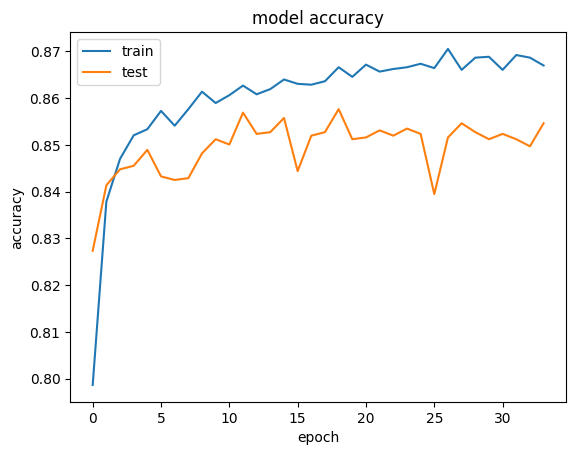

In [36]:
# plots plot the summary of history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')

Text(0.5, 0, 'epoch')

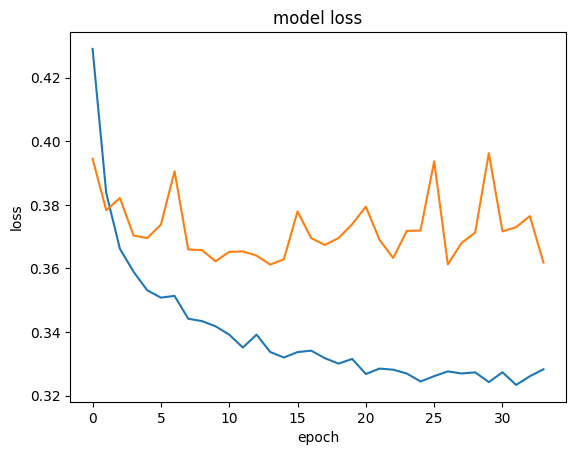

In [37]:
# lets plot it for the loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

In [40]:
# Making the predictioon and evaluating the model

# Predict the test set result
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5) # going to take it as 0 or 1

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [41]:
y_pred


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [43]:
# make the confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1514,   81],
       [ 213,  192]])

In [44]:
#calculate the accuracy

from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
score

0.853

In [45]:
# lets see the weights that were assigned to the corrosponding train

classifier.get_weights()

[array([[ 7.4484015e-01, -7.3554152e-01,  1.3861342e-01, -3.2683301e-01,
         -4.0206346e-01, -1.0545909e+00, -6.5988076e-01,  2.2310334e-01,
         -2.4638908e-01,  5.7707831e-02, -4.1556135e-01],
        [-2.9909959e-01,  2.1733196e+00, -1.6255162e+00,  7.8975964e-01,
         -2.8975759e+00, -1.6768841e-01,  9.2004865e-01, -2.7263880e-01,
         -2.7922955e+00, -2.9931660e+00,  6.3750815e-01],
        [-5.0437689e-02,  3.9414981e-01, -1.0227230e+00,  8.5045651e-02,
          1.7897396e-01,  9.3066001e-01,  9.9843316e-02,  9.4469488e-01,
          7.3760098e-01,  1.3903973e-01,  7.8420556e-01],
        [-1.9184729e+00, -1.2483461e+00, -1.1760250e+00,  6.6693348e-01,
         -1.4212836e-01, -2.0882421e+00, -2.7155592e+00,  2.5097091e+00,
         -6.6777483e-02, -1.1532161e+00, -1.2868382e+00],
        [ 1.5397540e+00,  7.8532422e-01,  1.9803210e-01,  3.3203797e+00,
          1.2230836e+00, -1.2680185e+00, -2.7064776e+00, -7.1861440e-01,
         -1.0943570e+00,  1.3890587e+0

In [47]:
# save the model then do predictions